First, import all necessary modules: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hydron as hd

Next, define number of gridpoints, time stepsize and duration of the simulation:

In [2]:
N = 100    # number of gridpoints, units
dt = 1   # stepsize, s
tau = 3e3   # total duration, s
    
R = 100e8
idx = np.arange(0,N,dtype=np.float32)/(N-1)
X = np.zeros((3,N), dtype = np.double)    # (N by 3) array of gridpoint coordinates, cm
X[0] = np.cos(np.pi*idx)*R              # x-coordinates, cm
X[2] = np.sin(np.pi*idx)*R              # y-coordinates, cm*L
    
cfg = hd.loopconfig()
cfg.Hr = lambda s,t: np.ones_like(s)*1e-3

Then we set the initial values of density $n$, velocity $u$ and temperature $T$:

In [3]:
#n = 1e11-np.sin(np.pi*idx)*(1e11-1e9)
#T = 2e4-np.sin(np.pi*idx)*(2e4-1e6)
n = np.ones(N, dtype = np.double)*1e9     # density, cm^{-3}
u = np.zeros(N, dtype = np.double)        # velocity, cm/s
T = np.ones(N, dtype = np.double)*2e4     # temperature, K

Further we define the heating rate as a function of time $t$ and coordinate along the loop $s$:

In [4]:
sim = hd.Solver(X,n,u,T,cfg)
out = sim.run(dt,tau)

in progress...	100% 
done!

Elapsed time: 18.20 seconds


In [5]:
#out = sim.run(dt,tau,out)

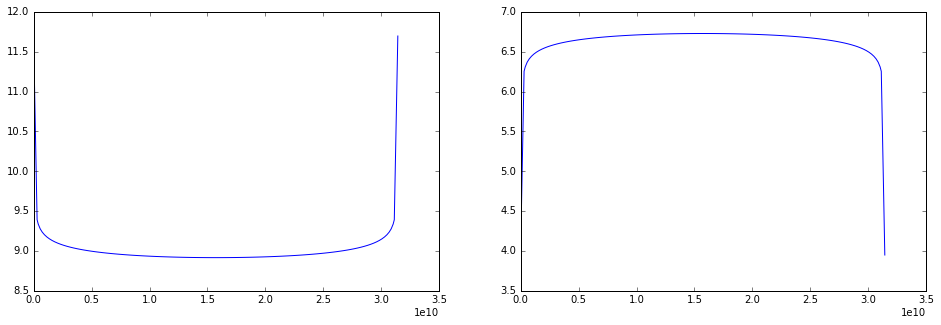

In [6]:
plt.figure(figsize = (16,5))
plt.subplot(121)
plt.plot(out.s()[-1], np.log10(out.n()[-1]))
plt.subplot(122)
plt.plot(out.s()[-1], np.log10(out.T()[-1]))


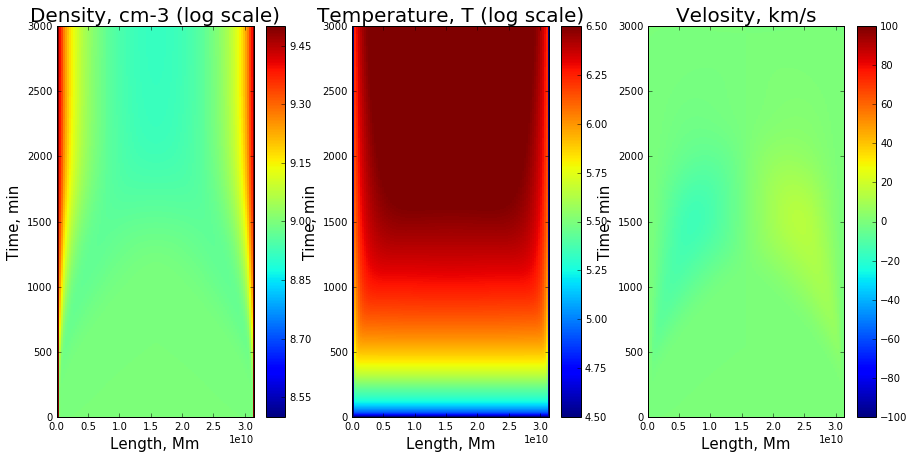

In [7]:
fig = plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Density, cm-3 (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(out.n()), vmin = 8.5, vmax=9.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,out.L()[-1],0,out.tau()])
plt.colorbar()

plt.subplot(1,3,2)
plt.title('Temperature, T (log scale)', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(np.log10(out.T()), vmin = 4.5, vmax=6.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,out.L()[-1],0,out.tau()])
plt.colorbar()

plt.subplot(1,3,3)
plt.title('Velosity, km/s', size = 20)
plt.xlabel('Length, Mm', size = 15)
plt.ylabel('Time, min', size = 15)
plt.imshow(out.u()/1e5, vmin = -100, vmax = 100,
           origin = 'lower', aspect = 'auto', interpolation = 'nearest',
           extent = [0,out.L()[-1],0,out.tau()])
plt.colorbar()


In [8]:
#hd.save(sim,'static.sim')


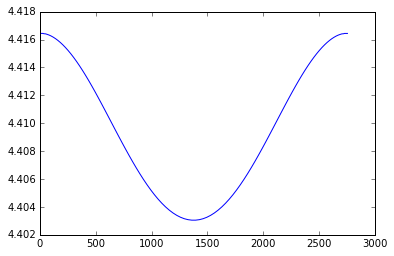

In [9]:
plt.plot(sim.x,sim.p)

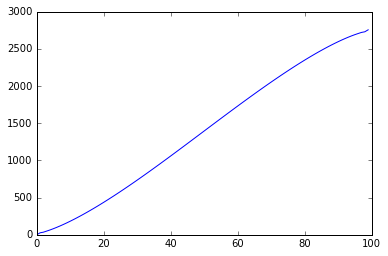

In [10]:
plt.plot(sim.x)

In [11]:
sim.ndim

3L